# Create plots for thesis

In [1]:
import xml.etree.ElementTree as ET
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps
import os
import cv2
import skimage as ski
import bioformats as bf
import javabridge
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
font = {'family' : 'serif',
         'size'   : 26,
         'serif':  'cmr10'
         }
plt.rc('font', **font)
plt.rcParams.update({'font.size': 26})

from matplotlib.ticker import MaxNLocator, AutoLocator
from multiprocessing import Process, Queue
import pathlib
import seaborn as sns 
import plotly
import imageio.v3 as iio
import plotly.graph_objs as go
from IPython.display import display, HTML
from helper_functions.helper_functions import get_coords, pixels_between_points
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [2]:
# h5_file = 'D:/Master/Granule_Explorer/granule_explorer_core/experiments/gradient_all_files/fourier/2020-02-05_14.36.40--NAs--T1354-GFP_Burst.h5'
# granule_id = 1                                                                                   #"2020-02-05_14.36.40--NAs--T1354-GFP_Burst"

In [3]:
# image_analysed_results_df = pd.read_hdf(Path(h5_file), mode="r", key="fourier") # granule_id = 1
# image_analysed_results_df

In [4]:
# fig = go.Figure()
# angles = np.linspace(0,2*np.pi,400)
# angles = np.rad2deg(angles)

# radii_mean = np.zeros_like(angles)
# valid_frames_count = 0

# for frame_id in range(1000):
#     granule_fourier: pd.DataFrame = image_analysed_results_df[(image_analysed_results_df['granule_id'] == granule_id) & (image_analysed_results_df['frame'] == frame_id) & (image_analysed_results_df['valid'] == True)]
#     if granule_fourier.empty:
#         continue
    
#     magnitude = granule_fourier['magnitude']
#     magnitudes = np.append( np.array([0.0+0.0j, 0.0+0.0j]), magnitude) * 400
#     mean_radius = granule_fourier['mean_radius'].iloc[0]

#     radii = mean_radius+ np.fft.irfft(magnitudes, 400) 
#     radii_mean += radii
#     valid_frames_count += 1

#     fig.add_trace(go.Scatterpolar(
#         r = radii,
#         theta = angles,
#         mode = 'lines',
#         opacity=0.01,
#         # opacity=0.0075,
#         line_color = "blue"
#     ))

# radii_mean = radii_mean / valid_frames_count
# fig.add_trace(go.Scatterpolar(
#     r = radii_mean,
#     theta = angles,
#     mode = 'lines',
#     opacity=0.75,
#     line_color = "red",
#     line = dict(shape = 'linear', color = 'red', width = 5, dash = 'dash'),
# ))

# fig.update_layout(showlegend=False)
# fig.update_layout(
#     polar = dict(
#     #   radialaxis = dict(
#     #       title=dict(
#     #           text = ""
#     #       ),
          
#     #   ),
#         angularaxis = dict(showticklabels=False, ticks='') # No deg ticks
#     ))
# # fig.update_polars(radialaxis_linewidth=8) # TODO: Might be usefull for increasing tick size https://stackoverflow.com/questions/70411834/how-to-hide-axis-tick-labels-in-plotly
# # fig.update_polars(radialaxis_tickwidth=40)
# fig.update_layout(
#         polar = dict(
#             angularaxis=dict(
#                 #thetaunit = "degrees",
#                 dtick=60,
#                 #rotation=270,
#                 direction="counterclockwise",
#                 #tickmode="array",
#                 # linewidth = 10 # Does not work
#                 gridwidth = 1,
#                 gridcolor = '#8e8e8e'#'#686868'
#             ),
#             radialaxis = dict(
#                 gridwidth = 1,
#                 gridcolor = '#8e8e8e',#'#686868',
#                 # linewidth = 0,
#                 linecolor = '#8e8e8e',#'#686868'
#                 tickfont = dict(
#                     size=25
#                 )
#             )
#         ),
#         # height=600
#     )
# fig.update_layout(
#     {
#         "paper_bgcolor": "rgba(0, 0, 0, 0)",
#         "plot_bgcolor": "rgba(0, 0, 0, 0)",
#     }
# )
# # fig.update_polars(
# #     radialaxis_title_text='Normalized STD',
# # )

# # plotly.offline.init_notebook_mode()
# # display(HTML(
# #     '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
# # ))

## fig.update_layout(
##     title = r'$\text{Radius } (\mu m)$'
## )
# # fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Granule_2_Border_fluctuations.svg", height=1000, width=1000)
# fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Granule_2_Border_fluctuations.png", height=1000, width=1000)
# fig.show()


# Somehow add y-axis title to ploar figure -> "Radius (um)"

In [11]:
image_analysed_results_df_collage = pd.read_hdf("C:/Users/Endre/Desktop/Border_bug/2019-10-31_12.18.43--NControlLongB--T1015-Burst.h5", mode="r", key="fourier")
image_analysed_results_df_collage

,im_path,frame,granule_id,order,magnitude,order_1,x,y,bbox_left,bbox_bottom,bbox_right,bbox_top,mean_radius,valid,major_axis,minor_axis,eccentricity,mean_intensity
0,\nobackup\wwsm77\microscopy\as_31\2019-10-31_1...,0,0,2,0.069881+0.067678j,-0.013884-0.007818j,804.921455,115.065792,778,94,834,141,1.781662,False,4.548694,3.247275,0.700256,51221.597855
1,\nobackup\wwsm77\microscopy\as_31\2019-10-31_1...,0,0,3,-0.001224+0.047632j,-0.013884-0.007818j,804.921455,115.065792,778,94,834,141,1.781662,False,4.548694,3.247275,0.700256,51221.597855
2,\nobackup\wwsm77\microscopy\as_31\2019-10-31_1...,0,0,4,0.017564+0.024586j,-0.013884-0.007818j,804.921455,115.065792,778,94,834,141,1.781662,False,4.548694,3.247275,0.700256,51221.597855
3,\nobackup\wwsm77\microscopy\as_31\2019-10-31_1...,0,0,5,-0.012991-0.015849j,-0.013884-0.007818j,804.921455,115.065792,778,94,834,141,1.781662,False,4.548694,3.247275,0.700256,51221.597855
4,\nobackup\wwsm77\microscopy\as_31\2019-10-31_1...,0,0,6,0.009905-0.002857j,-0.013884-0.007818j,804.921455,115.065792,778,94,834,141,1.781662,False,4.548694,3.247275,0.700256,51221.597855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745845,\nobackup\wwsm77\microscopy\as_31\2019-10-31_1...,1999,619,55,-0.007742+0.000943j,0.082666+0.204768j,283.544098,708.376363,274,700,295,720,0.474917,False,1.093853,0.834913,0.646071,16693.164179
4745846,\nobackup\wwsm77\microscopy\as_31\2019-10-31_1...,1999,619,56,-0.004355-0.000306j,0.082666+0.204768j,283.544098,708.376363,274,700,295,720,0.474917,False,1.093853,0.834913,0.646071,16693.164179
4745847,\nobackup\wwsm77\microscopy\as_31\2019-10-31_1...,1999,619,57,-0.000903+0.000001j,0.082666+0.204768j,283.544098,708.376363,274,700,295,720,0.474917,False,1.093853,0.834913,0.646071,16693.164179
4745848,\nobackup\wwsm77\microscopy\as_31\2019-10-31_1...,1999,619,58,0.002706+0.001956j,0.082666+0.204768j,283.544098,708.376363,274,700,295,720,0.474917,False,1.093853,0.834913,0.646071,16693.164179


# Collage of successfully detected granules

In [5]:
ims_file = "2020-02-05_15.41.32-NAs-T1354-GFP_Burst"
h5_file = f"D:/Master/MasterProject/model_creation/datasets/analyzed_granule_data/{ims_file}.h5"
image_analysed_results_df_collage = pd.read_hdf(h5_file, mode="r", key="fourier")

### Creates 2x2 collage of granules with red borders

In [10]:
valid_granule_fourier = image_analysed_results_df_collage[(image_analysed_results_df_collage['valid'] == True) & (image_analysed_results_df_collage['frame'] == 0)]['granule_id']
valid_granule_ids = valid_granule_fourier.unique()
frame_id = 0


im = iio.imread('D:/Master/MasterProject/dataset_creation/datasets/full_frame_dataset/train - Copy/2020-02-05_15.41.32-NAs-T1354-GFP_Burst_Frame_0.png')

fig = make_subplots(rows=2, cols=2, 
                    horizontal_spacing=0.01, 
                    vertical_spacing=0.1,
                    # subplot_titles=('Standard image', 'Upscale NEAREST', 'Upscale HAMMING', 'Upscale BICUBIC',)
                    )
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    }
)
fig.update_layout(showlegend=False)
# fig.update_layout(title_text=f"Correctly analysed granules", title_x=0.5, width=1200, height=1000, showlegend=False, font_size=20)

for row,col in [(1,1),(1,2),(2,1),(2,2)]:
    # granule_fourier: pd.DataFrame = image_analysed_results_df[(image_analysed_results_df['granule_id'] == granule_id) & (image_analysed_results_df['frame'] == frame_id) & (image_analysed_results_df['valid'] == True)]
    granule_id_collage = valid_granule_ids[np.random.randint(0,len(valid_granule_ids))]
    granule_fourier = image_analysed_results_df_collage[(image_analysed_results_df_collage['granule_id'] == granule_id_collage) & (image_analysed_results_df_collage['frame'] == 0)]

    bbox_left = granule_fourier['bbox_left'].iloc[0]
    bbox_right = granule_fourier['bbox_right'].iloc[0]
    bbox_top = granule_fourier['bbox_top'].iloc[0]
    bbox_bottom = granule_fourier['bbox_bottom'].iloc[0]
    granule_cutout_image = im[bbox_left:bbox_right, bbox_bottom:bbox_top]

    # Add images to plot
    base_image_fig = px.imshow(granule_cutout_image)
    fig.add_trace(base_image_fig.data[0], row, col)

    xs,ys = get_coords(granule_fourier, get_relative=True)
    fig.add_trace(go.Scatter(x=np.append(xs,xs[0]), y=np.append(ys,ys[0]), marker=dict(color='red', size=16), name=f"100 p border {granule_id_collage}"), row=row, col=col)

fig.show(width=1000, height=1000)

In [7]:
def scale_padding(original_image, img_dims: tuple[int,int], granule_fourier: pd.DataFrame, NEW_MAX_HEIGHT=1024, NEW_MAX_WIDTH=1024) -> tuple[np.array, np.array, np.array]:
    # ------------------- Upscale image -------------------
    cutout_height, cutout_width = img_dims
    max_scale_height = int(np.floor(NEW_MAX_HEIGHT / cutout_height))
    max_scale_width  = int(np.floor(NEW_MAX_WIDTH / cutout_width))
    scale_factor = min(max_scale_height, max_scale_width) # Max amount to scale by while keeping aspect ratio
    upscaled_image = original_image.resize((cutout_width*scale_factor, cutout_height*scale_factor), resample=Image.Resampling.NEAREST)
    # ------------------- Add padding -------------------
    # assert upscaled_image.size == (NEW_MAX_HEIGHT, NEW_MAX_WIDTH), f"New size of image is wrong. What? Was {upscaled_image.size} should be {NEW_MAX_HEIGHT, NEW_MAX_WIDTH}"
    image_width, image_height = (cutout_width*scale_factor, cutout_height*scale_factor)
    delta_w = NEW_MAX_WIDTH - image_width
    delta_h = NEW_MAX_HEIGHT - image_height
    padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
    new_im = ImageOps.expand(upscaled_image, padding)
    # ------------------- Get pixel border -------------------
    xs, ys = get_coords(granule_fourier, get_relative=True)
    xs = np.append(xs,xs[0]) # Add connection from last element to start element
    ys = np.append(ys,ys[0])
    # --- Scale border points ---
    xs_upscaled = xs * scale_factor + scale_factor / 2 - 1/2 
    ys_upscaled = ys * scale_factor + scale_factor / 2 - 1/2
    # --- Scale border points ---
    xs_upscaled += delta_w // 2
    ys_upscaled += delta_h // 2
    upscaled_width, upscaled_height = new_im.size
    assert (upscaled_width, upscaled_height) == (NEW_MAX_WIDTH, NEW_MAX_HEIGHT), f"Should be {(NEW_MAX_WIDTH, NEW_MAX_HEIGHT)} == {(upscaled_width, upscaled_height)}"
    
    # return None, xs_upscaled, ys_upscaled
    return np.array(new_im), xs_upscaled, ys_upscaled

## Creates multiple singular granule+border images and saves to location

In [8]:
# frame_id = 0

# valid_granule_fourier = image_analysed_results_df_collage[(image_analysed_results_df_collage['valid'] == True) & (image_analysed_results_df_collage['frame'] == frame_id)]['granule_id']
# valid_granule_ids = valid_granule_fourier.unique()

# im = iio.imread(f"D:/Master/MasterProject/dataset_creation/datasets/full_frame_dataset/train - Copy/2020-02-05_15.41.32-NAs-T1354-GFP_Burst_Frame_{frame_id}.png")
# for valid_gr in valid_granule_ids:
#     fig = make_subplots(rows=1, cols=1, 
#                     # horizontal_spacing=0.01, 
#                     # vertical_spacing=0.1,
#                     # subplot_titles=('Standard image', 'Upscale NEAREST', 'Upscale HAMMING', 'Upscale BICUBIC',)
#                     )
#     fig.update_layout(
#         {
#             "paper_bgcolor": "rgba(0, 0, 0, 0)",
#             "plot_bgcolor": "rgba(0, 0, 0, 0)",
#         }
#     )
#     fig.update_layout(showlegend=False, font_size=20)
#     # fig.update_layout(title_text=f"Correctly analysed granules", title_x=0.5, width=1200, height=1000, showlegend=False, font_size=20)
    
#     # granule_fourier: pd.DataFrame = image_analysed_results_df[(image_analysed_results_df['granule_id'] == granule_id) & (image_analysed_results_df['frame'] == frame_id) & (image_analysed_results_df['valid'] == True)]
#     granule_fourier = image_analysed_results_df_collage[(image_analysed_results_df_collage['granule_id'] == valid_gr) & (image_analysed_results_df_collage['frame'] == 0)]
#     if granule_fourier.empty:
#         continue
#     bbox_left = granule_fourier['bbox_left'].iloc[0]
#     bbox_right = granule_fourier['bbox_right'].iloc[0]
#     bbox_top = granule_fourier['bbox_top'].iloc[0]
#     bbox_bottom = granule_fourier['bbox_bottom'].iloc[0]
#     granule_cutout_image = im[bbox_left:bbox_right, bbox_bottom:bbox_top]

#     # ------------------- Scaling the granule cutout ------------------- 
#     original_image = Image.fromarray(granule_cutout_image)
#     cutout_height, cutout_width = abs(bbox_left-bbox_right), abs(bbox_bottom - bbox_top)
#     granule_cutout_image, xs, ys = scale_padding(original_image, (cutout_height, cutout_width), granule_fourier, NEW_MAX_HEIGHT = 1024, NEW_MAX_WIDTH = 1024)

#     # Add images to plot
#     # fig.add_trace(go.Heatmap(z=self.processed_image, colorscale='viridis'), row=1, col=1)

#     base_image_fig = px.imshow(granule_cutout_image)
#     fig.add_trace(base_image_fig.data[0], 1, 1)

#     # xs,ys = get_coords(granule_fourier, get_relative=True)
#     fig.add_trace(go.Scatter(x=np.append(xs,xs[0]), y=np.append(ys,ys[0]), marker=dict(color='red', size=16), name=f"100 p border {valid_gr}"), row=1, col=1)
    
#     fig.update_xaxes(showticklabels=False) # Hide x axis ticks 
#     fig.update_yaxes(showticklabels=False) # Hide y axis ticks
#     fig.update_yaxes(autorange=True, row=1,col=1)
#     # fig.write_image(file=f"D:/Master/MasterProject/Overleaf_figures/Chapter2/Granule_cutouts_with_border_2/{ims_file}_{frame_id}_{valid_gr}.svg", height=1000, width=1000)
#     fig.write_image(file=f"D:/Master/MasterProject/Overleaf_figures/Chapter2/Granule_cutouts_with_border_2/{ims_file}_{frame_id}_{valid_gr}.png", height=1000, width=1000)

#     # fig.show()

# Chapter 4

In [9]:
# # label_directory = "D:/Master/MasterProject/dataset_creation/datasets/FINAL_DATASET_cutout_with_padding/compiled_datasets_16bit_tiny/train/labels"
# label_directory = "D:/Master/MasterProject/dataset_creation/datasets/FINAL_DATASET_cutout_with_padding/labels_as_images"

# ids = os.listdir(label_directory)
# masks = [os.path.join(label_directory, image_id) for image_id in ids]

# # stats = {
# #     "0":[],
# #     "1":[],
# # }
# zeros = np.zeros((len(masks)))
# ones = np.zeros((len(masks)))
# mask_figure = np.zeros((1024,1024))
# for i in range(len(masks)):#[:1000]:
#     if i % 1000 == 0:
#         print("Image", i)
#         np.save("images/mask_figure", mask_figure)
#         np.save("images/zeros", zeros)
#         np.save("images/ones", ones)
#     mask = masks[i]
#     mask = cv2.imread(mask, cv2.IMREAD_UNCHANGED) # 0
#     mask_figure += mask
    
#     # Save info
#     ones_in_mask = np.sum(mask)
#     ones[i] = ones_in_mask
#     zeros[i] = 1024*1024-ones_in_mask
#     # assert len(mask[(mask == 1)]) == ones_in_mask, f"id={i} - {len(mask[(mask == 1)])} == {ones_in_mask} | {len(mask[(mask == 1)]) == ones_in_mask}"

#     # fig = go.Figure()
#     # fig.add_trace(go.Heatmap(z=mask))
#     # fig.show()
#     # print(f"{len(mask[(mask == 1)])} == {ones_in_mask} | {len(mask[(mask == 1)]) == ones_in_mask}")
#     # break

# np.save("images/mask_figure", mask_figure)
# np.save("images/zeros", zeros)
# np.save("images/ones", ones)

In [10]:
# label_directory = "D:/Master/MasterProject/dataset_creation/datasets/FINAL_DATASET_cutout_with_padding/labels_as_images"
# ids = os.listdir(label_directory)
# masks = [os.path.join(label_directory, image_id) for image_id in ids]

ones_loaded = np.load("images/ones.npy")
max = 1024*1024
for i in range(len(ones_loaded)):
    if (ones_loaded[i] / max) > 0.6: # Print the big ones with errors. 
        # print(i)
        ones_loaded[i] = None
    # if (ones_loaded[i]) == 0: # Print the big ones with errors. 
    #     print(ids[i])
    #     ones_loaded[i] = None
    # if (ones_loaded[i] / max) < 0.01: # Print the big ones with errors. 
    #     print(ids[i])

    if (ones_loaded[i] / max) < 0.004:
        # print(ids[i], ones_loaded[i]/max)
        ones_loaded[i] = None
    if 0.004 < (ones_loaded[i] / max) < 0.0185:
        # print(i, ids[i], ones_loaded[i]/max)
        ones_loaded[i] = None
    if 0.0185 < (ones_loaded[i] / max) < 0.04:
        # print(ids[i], ones_loaded[i]/max)
        ones_loaded[i] = None
    if (ones_loaded[i] / max) < 0.1:
        # print(ids[i], ones_loaded[i]/max)
        ones_loaded[i] = None
    if (ones_loaded[i] / max) > 0.48:
        # print(ids[i], ones_loaded[i]/max)
        ones_loaded[i] = None
    # if 0.49 < (ones_loaded[i] / max) :
    #     print(ids[i], ones_loaded[i]/max)
        # ones_loaded[i] = None

4.0163868583822
597580


C:\Users\Endre\AppData\Local\Temp\ipykernel_183416\2989645846.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


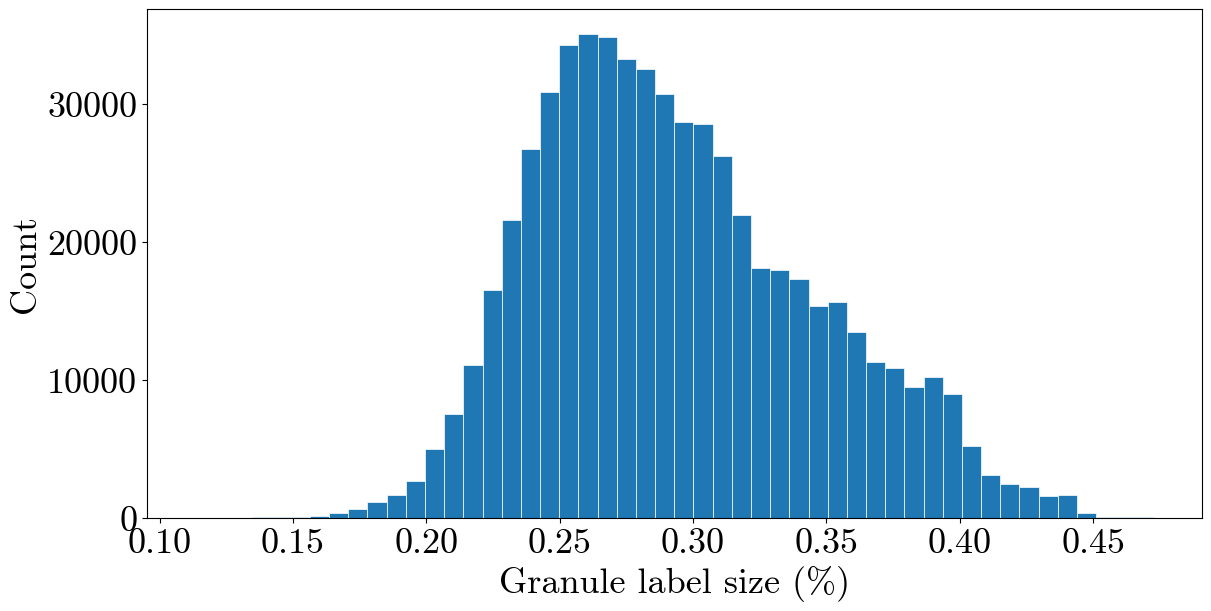

In [11]:
# ones_loaded = np.load("images/complete_ones.npy")
# ones_loaded = np.load("images/ones.npy")
ones_loaded[ones_loaded == 0] = None
print(600000 / np.count_nonzero(ones_loaded > 0))
print(np.concatenate((ones_loaded,ones_loaded,ones_loaded,ones_loaded)).size)
# zeros_loaded = np.load("images/complete_zeros.npy")
stats_df = pd.DataFrame({
    "1":np.concatenate((ones_loaded,ones_loaded,ones_loaded,ones_loaded)),
    # "0":zeros_loaded,
})
stats_df = stats_df / (1024*1024)
# fig = px.histogram(x=stats_df["1"],
#                    marginal="box", # or violin, rug
#                    nbins=50)
#                 #    hover_data=stats_df["1"].columns, nbins=50)
# fig.update_layout(
#     xaxis_title="Granule label size (%)", yaxis_title="Count"
# )
# fig.update_layout( width=1200, height=500, showlegend=False, font_size=20)
# # fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/Granule_size_distribution_ALL_DATA.svg", )#height=1000, width=1000)
# # fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/Granule_size_distribution_ALL_DATA.png", )#height=1000, width=1000)
# fig.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), layout='constrained')
# --- Hist ---
ax.hist(stats_df["1"], bins=50, linewidth=0.5, edgecolor="white")
ax.set_ylabel('Count')
ax.set_xlabel('Granule label size (%)')
fig.show()
fig.savefig("D:/Master/MasterProject/Overleaf_figures/Chapter4/Granule_size_distribution_ALL_DATA.svg")   

In [12]:
# ones_loaded = np.load("images/complete_ones.npy")
# max = 1024*1024
# for i in range(len(ones_loaded)):
#     if (ones_loaded[i] / max) < 0.046:
#         print(i, ids[i], ones_loaded[i])

In [ ]:
fig = go.Figure()
mask_figure = np.load("images/mask_figure.npy")
mask_figure = mask_figure
fig.add_trace(go.Heatmap(z=mask_figure/np.max(mask_figure), colorscale='Inferno'))
fig.update_layout( width=1200, height=1000, showlegend=False, font_size=35)
fig.update_layout({
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
    "plot_bgcolor": "rgba(0, 0, 0, 0)", })
fig.update_layout(
    font_family="DejaVu Sans",
    font_color="black",
    title_font_family="DejaVu Sans",
    title_font_color="black",
)
fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/Average_granule.svg", height=1000, width=1000)
fig.show()

## Merge two images into a 2-channel image

In [14]:
image = cv2.imread("D:/Master/MasterProject/Overleaf_figures/Chapter2/Granule_1_raw.png", cv2.IMREAD_GRAYSCALE)
gradient = cv2.imread("D:/Master/MasterProject/Overleaf_figures/Chapter2/Granule_1_gradient.png", cv2.IMREAD_GRAYSCALE)

image = np.expand_dims(image, axis=-1)
gradient = np.expand_dims(gradient, axis=-1)

two_channel = np.concatenate((image,gradient, gradient), axis=2)
two_channel.shape
two_channel[500,500]
fig = go.Figure()

# fig.add_trace(go.Heatmap(z=two_channel, colorscale='viridis'))
# fig = px.imshow(two_channel)
# fig.update_layout(showlegend=False, font_size=11)
# fig.update_layout(
# autosize=False,
# width=1100,
# height=1100,)
# fig.show()

# Read width x height off all .h5

In [15]:
all_h5 = "D:/Master/MasterProject/dataset_creation/data/ALL_FOURIER_h5"

# h5_files = [file[:-4] for file in os.listdir(all_h5)]
h5_files = [file for file in os.listdir(all_h5)]

df_ALL_H5_relevant_data = {
    'width' : [],
    'height' : [],
    'aspect_ratio' : [],
}

for h5 in h5_files:
    print(h5)
    image_analysed_results_df = pd.read_hdf(Path(all_h5 + "/" + h5), mode="r", key="fourier")
    # valid_granule_fourier = image_analysed_results_df[(image_analysed_results_df['valid'] == True) & (image_analysed_results_df['order'] == 3) & (image_analysed_results_df['frame'] == 0)]
    valid_granule_fourier = image_analysed_results_df[(image_analysed_results_df['valid'] == True) & (image_analysed_results_df['order'] == 3)]
    
    width  = valid_granule_fourier['bbox_right'] - valid_granule_fourier['bbox_left'] 
    height = valid_granule_fourier['bbox_top'] - valid_granule_fourier['bbox_bottom']

    df_ALL_H5_relevant_data['width'] += width.to_list()
    df_ALL_H5_relevant_data['height'] += height.to_list()
    df_ALL_H5_relevant_data['aspect_ratio'] += (width / height).to_list()


2020-02-05_14.18.49--NAs--T1354-GFP_Burst.h5
2020-02-05_14.20.33--NAs--T1354-GFP_Burst.h5
2020-02-05_14.21.32--NAs--T1354-GFP_Burst.h5
2020-02-05_14.22.31--NAs--T1354-GFP_Burst.h5
2020-02-05_14.24.00--NAs--T1354-GFP_Burst.h5
2020-02-05_14.25.05--NAs--T1354-GFP_Burst.h5
2020-02-05_14.26.01--NAs--T1354-GFP_Burst.h5
2020-02-05_14.27.05--NAs--T1354-GFP_Burst.h5
2020-02-05_14.31.38--NAs--T1354-GFP_Burst.h5
2020-02-05_14.32.49--NAs--T1354-GFP_Burst.h5
2020-02-05_14.34.33--NAs--T1354-GFP_Burst.h5
2020-02-05_14.35.36--NAs--T1354-GFP_Burst.h5
2020-02-05_14.36.40--NAs--T1354-GFP_Burst.h5
2020-02-05_14.37.45--NAs--T1354-GFP_Burst.h5
2020-02-05_14.38.46--NAs--T1354-GFP_Burst.h5
2020-02-05_14.39.43--NAs--T1354-GFP_Burst.h5
2020-02-05_14.40.44--NAs--T1354-GFP_Burst.h5
2020-02-05_14.41.42--NAs--T1354-GFP_Burst.h5
2020-02-05_14.43.03--NAs--T1354-GFP_Burst.h5
2020-02-05_14.44.01--NAs--T1354-GFP_Burst.h5
2020-02-05_14.45.04--NAs--T1354-GFP_Burst.h5
2020-02-05_14.46.06--NAs--T1354-GFP_Burst.h5
2020-02-05

In [16]:
df_ALL_H5_relevant_data = pd.DataFrame(df_ALL_H5_relevant_data)
df_ALL_H5_relevant_data[:3]

,width,height,aspect_ratio
0,43,39,1.102564
1,38,37,1.027027
2,35,36,0.972222


# Granules image size plot

In [17]:
# analysis_files = "D:/Master/MasterProject/dataset_creation/datasets/FINAL_DATASET_cutout_with_padding/images_saved_analysis_data"
# ids = os.listdir(analysis_files)
# csv_files = [os.path.join(analysis_files, image_id) for image_id in ids]

# df = pd.read_csv(csv_files[0], index_col=0)
# for file in csv_files[1:]:
#     df_loaded = pd.read_csv(file, index_col=0)
#     df = pd.concat((df, df_loaded))
# df[:4]

In [18]:
# df1 = df_ALL_H5_relevant_data.groupby(['width','height']).size().reset_index().rename(columns={0:'count'})
# df1 = df.groupby(['width','height']).size().reset_index().rename(columns={0:'count'})

# fig = go.Figure()
# scatter_density_of_height_width = go.Scatter(x=df1['width'], y=df1['height'], # THIS IS THE OLD ONE
#                     mode='markers',
#                     name='markers',
#                     marker=dict(
#                         #size=16,
#                         color = df1['count'], #set color equal to a variable
#                         colorscale='inferno', #'Viridis',
#                         showscale=True
#                     ),
#                     customdata=df1[['count']],
#                     hovertemplate=
#                         "<b>Amount %{customdata[0]}</b><br><br>" +
#                         "Width %{x}<br>" +
#                         "Height: %{y}<br>" +
#                         "<extra></extra>",
                    
#     )
# fig.add_trace(scatter_density_of_height_width)
# fig.update_layout(
#         xaxis_title=dict(text='Width (pixels)', font=dict(size=20)),
#         yaxis_title=dict(text='Height (pixels)', font=dict(size=20)),
# )
# fig.update_layout(
#     {
#         # xaxis=dict(tickfont=dict(size=14, color='#FFFFFF')),
#         # yaxis=dict(tickfont=dict(size=14, color='#FFFFFF')),

#         "paper_bgcolor": "rgba(0, 0, 0, 0)",
#         # "plot_bgcolor": "rgba(0, 0, 0, 0)",
#     }
# )
# fig.update_layout(font_size=20)
# fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/granule_image_dimenstions_scatter.svg", height=600, width=1200)
# fig.show()

In [19]:
# # df['aspect_ratio'] = df['width'] / df['height']
# fig = px.histogram(x=df_ALL_H5_relevant_data["aspect_ratio"], # THIS IS THE OLD ONE
#                    marginal="box", # or violin, rug
#                    nbins=50)
# fig.update_layout(
#     {
#         # xaxis=dict(tickfont=dict(size=14, color='#FFFFFF')),
#         # yaxis=dict(tickfont=dict(size=14, color='#FFFFFF')),

#         "paper_bgcolor": "rgba(0, 0, 0, 0)",
#         # "plot_bgcolor": "rgba(0, 0, 0, 0)",
#     }
# )
# fig.update_layout(font_size=20)
# fig.update_layout(
#     xaxis_title="Granule image aspect ratio", yaxis_title="Count"
# )
# fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/granule_image_aspect_ratio_dist.svg", height=600, width=1200)
# fig.show()

# image_size_ratio_dist_NEW

C:\Users\Endre\AppData\Local\Temp\ipykernel_183416\2240074321.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Endre\AppData\Local\Temp\ipykernel_183416\2240074321.py:31: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



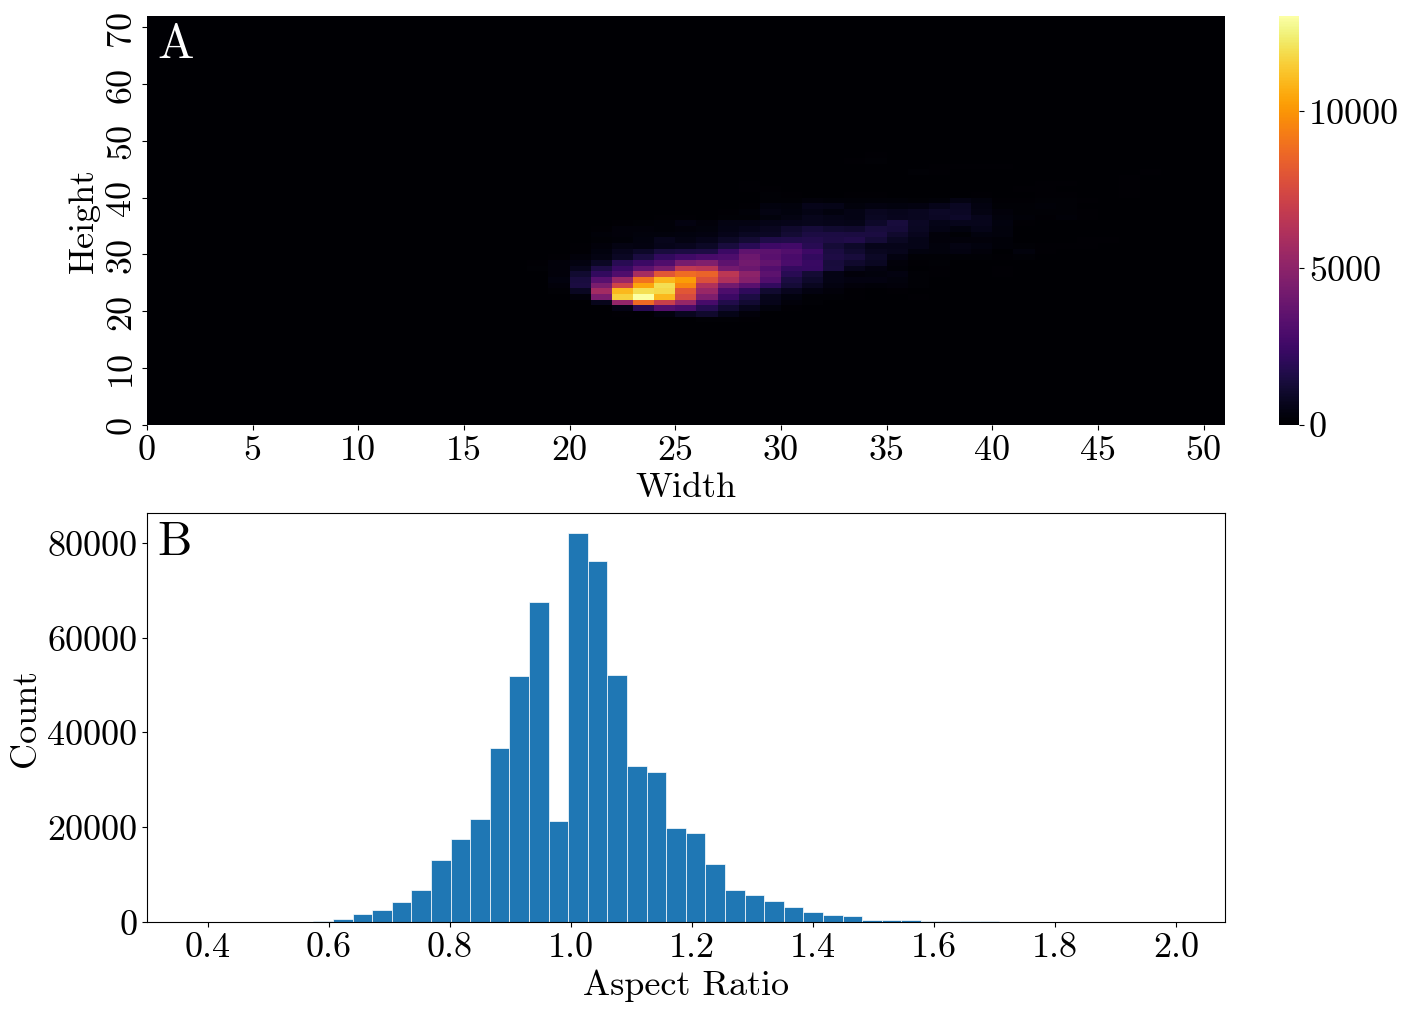

In [20]:
df1 = df_ALL_H5_relevant_data.groupby(['width','height']).size().reset_index().rename(columns={0:'count'})
max_width, max_height = df1.max()[0], df1.max()[1]
heatmap = np.zeros(( max_height+1, max_width+1,))

for index, row in df1.iterrows():
    h, w, c, = row['height'], row['width'], row['count']
    heatmap[h,w] = c

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), layout='constrained')
# ax = sns.heatmap()
cmap = plt.colormaps["inferno"]
g1 = sns.heatmap(heatmap,ax=ax1, rasterized=True, cmap=cmap)
# https://stackoverflow.com/questions/27092991/white-lines-in-matplotlibs-pcolor To fix artifacts
# ax1.imshow(heatmap,  cmap='hot')#, extent=[heatmap.min(), heatmap.max(), heatmap.min(), heatmap.max()])  # interpolation='nearest',
g1.set_ylabel('Height')
g1.set_xlabel('Width')
g1.set_xticks(np.arange(0, max_width+1, 5), np.arange(0, max_width+1, 5))
g1.set_yticks(np.arange(0, max_height+1, 10), np.arange(0, max_height+1, 10))
# plt.xticks(np.arange(0, max_width+1, 5), np.arange(0, max_width+1, 5))
# plt.yticks(np.arange(0, max_height+1, 10), np.arange(0, max_height+1, 10))
ax1.invert_yaxis()
# --- Hist ---
ax2.hist(df_ALL_H5_relevant_data["aspect_ratio"], bins=50, linewidth=0.5, edgecolor="white")
ax2.set_ylabel('Count')
ax2.set_xlabel('Aspect Ratio')

# ax1.text(1.5, 70, "A", style='oblique', ha='center', va='top', color='white')
# ax2.text(0.33, -10, "B", style='oblique', ha='center', va='bottom', color='black')
ax1.annotate('A', xy=(0.01, 0.9), xycoords='axes fraction', color="white", fontsize=35)
ax2.annotate('B', xy=(0.01, 0.9), xycoords='axes fraction', fontsize=35)
fig.show()
fig.savefig("D:/Master/MasterProject/Overleaf_figures/Chapter4/granule_image_dimenstions_HEATMAP.svg")
    

# Max error in dataset

In [138]:
# Calc error
# Calc max upscaling, based on 1024 // max(width, height)
df_ALL_H5_relevant_data["max_scaling_factor"] = 1024 // df_ALL_H5_relevant_data[["width", "height"]].max(axis=1)
df_ALL_H5_relevant_data["max_error"] = 1/2 * np.sqrt(2*(1 / df_ALL_H5_relevant_data["max_scaling_factor"])**2)
df_ALL_H5_relevant_data[["max_error", "max_scaling_factor","width", "height"]]

,max_error,max_scaling_factor,width,height
0,0.030744,23,43,39
1,0.027196,26,38,37
2,0.025254,28,35,36
3,0.029463,24,41,37
4,0.025254,28,35,36
...,...,...,...,...
596828,0.016836,42,22,24
596829,0.017678,40,25,23
596830,0.016071,44,23,23
596831,0.016071,44,22,23


In [141]:
print(df_ALL_H5_relevant_data["max_scaling_factor"].median())
df_ALL_H5_relevant_data["max_scaling_factor"].describe()
# df_ALL_H5_relevant_data[df_ALL_H5_relevant_data["max_error"]]

37.0


count    596833.000000
mean         37.098094
std           5.184819
min          14.000000
25%          34.000000
50%          37.000000
75%          40.000000
max          51.000000
Name: max_scaling_factor, dtype: float64

In [159]:
errors = {}
for i in range(1,50):
    errors[i] = 1/2 * np.sqrt(2 * (1/i)**2)
errors

{1: 0.7071067811865476,
 2: 0.3535533905932738,
 3: 0.23570226039551584,
 4: 0.1767766952966369,
 5: 0.14142135623730953,
 6: 0.11785113019775792,
 7: 0.10101525445522107,
 8: 0.08838834764831845,
 9: 0.07856742013183861,
 10: 0.07071067811865477,
 11: 0.0642824346533225,
 12: 0.05892556509887896,
 13: 0.05439282932204212,
 14: 0.050507627227610534,
 15: 0.04714045207910317,
 16: 0.04419417382415922,
 17: 0.04159451654038515,
 18: 0.039283710065919304,
 19: 0.03721614637823934,
 20: 0.03535533905932738,
 21: 0.03367175148507369,
 22: 0.03214121732666125,
 23: 0.030743773095067282,
 24: 0.02946278254943948,
 25: 0.0282842712474619,
 26: 0.02719641466102106,
 27: 0.026189140043946204,
 28: 0.025253813613805267,
 29: 0.024382992454708534,
 30: 0.023570226039551584,
 31: 0.022809896167307983,
 32: 0.02209708691207961,
 33: 0.02142747821777417,
 34: 0.020797258270192576,
 35: 0.020203050891044214,
 36: 0.019641855032959652,
 37: 0.019110994086122907,
 38: 0.01860807318911967,
 39: 0.0181309

[1. 2. 3. 4. 5. 6.]
(1.2032699427754274, 5.233976664665131)


C:\Users\Endre\AppData\Local\Temp\ipykernel_183416\1007558082.py:42: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



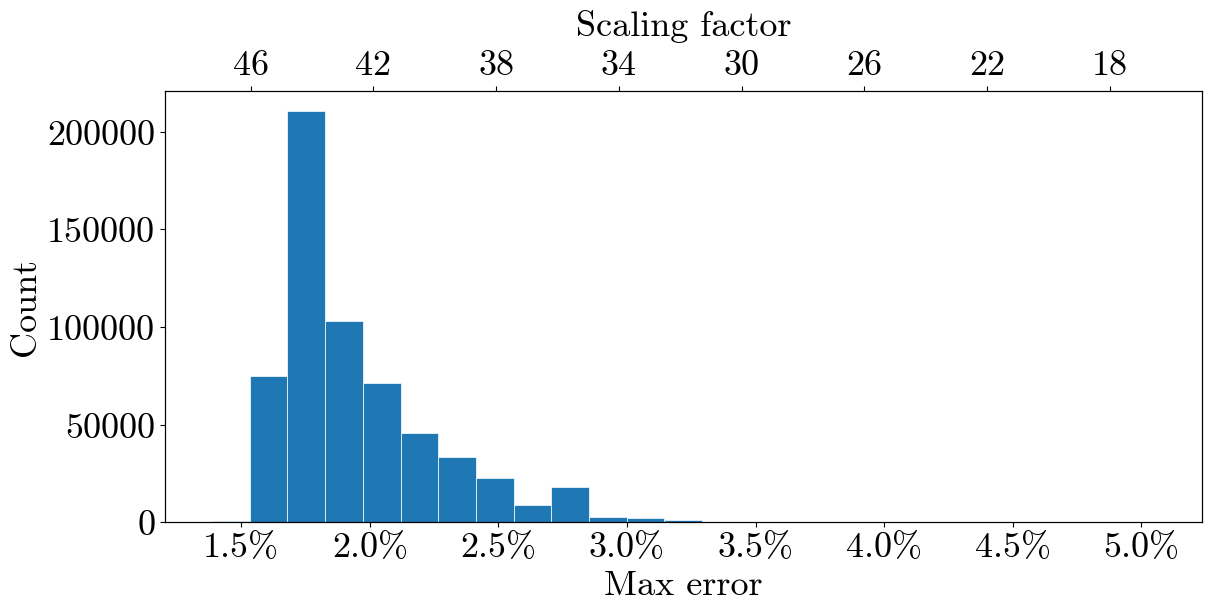

In [176]:
# fig = px.histogram(x=df_ALL_H5_relevant_data["max_error"], 
#                    marginal="box", # or violin, rug 
#                    nbins=50) 
# fig.update_layout(
#     {
#         # xaxis=dict(tickfont=dict(size=14, color='#FFFFFF')),
#         # yaxis=dict(tickfont=dict(size=14, color='#FFFFFF')),

#         "paper_bgcolor": "rgba(0, 0, 0, 0)",
#         # "plot_bgcolor": "rgba(0, 0, 0, 0)",
#     }
# )
# fig.update_layout(font_size=20)
# fig.update_layout(
#     xaxis_title="Max error in border representation", yaxis_title="Count"
# )
# fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/granule_image_MAX_ERRPR_DIST.svg", height=600, width=1200)
# fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/granule_image_MAX_ERRPR_DIST.png", height=600, width=1200)
# fig.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), layout='constrained')
# --- Hist ---
ax.hist(df_ALL_H5_relevant_data["max_error"]*100, bins=25, linewidth=0.5, edgecolor="white")
ax.set_ylabel('Count')
ax.set_xlabel('Max error')
ax.xaxis.set_major_formatter('{x:1.1f}%')

ax2 = ax.twiny()
min, max = df_ALL_H5_relevant_data["max_scaling_factor"].min(), df_ALL_H5_relevant_data["max_scaling_factor"].max()
errors = {}
for i in range(1,50):
    errors[i] = np.sqrt(2 * (1/i)**2)
print(ax.get_xticks())
print(ax.get_xlim())
ax2.set_xticks(np.flip(np.linspace(min, max, len(ax1.get_xticks()))).astype(int))
ax2.set_xlim(min+1, max-2.2)
# ax2.hist(df_ALL_H5_relevant_data["max_scaling_factor"], bins=25, linewidth=0.5, edgecolor="white", ax=ax2) # Create a dummy plot
# ax2.cla()
ax2.invert_xaxis()
ax2.set_xlabel("Scaling factor", rotation=0, labelpad=10)

fig.show()
fig.savefig("D:/Master/MasterProject/Overleaf_figures/Chapter4/granule_image_MAX_ERRPR_DIST.svg")   

# Error Scaling Factor

C:\Users\Endre\AppData\Local\Temp\ipykernel_183416\280907134.py:44: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



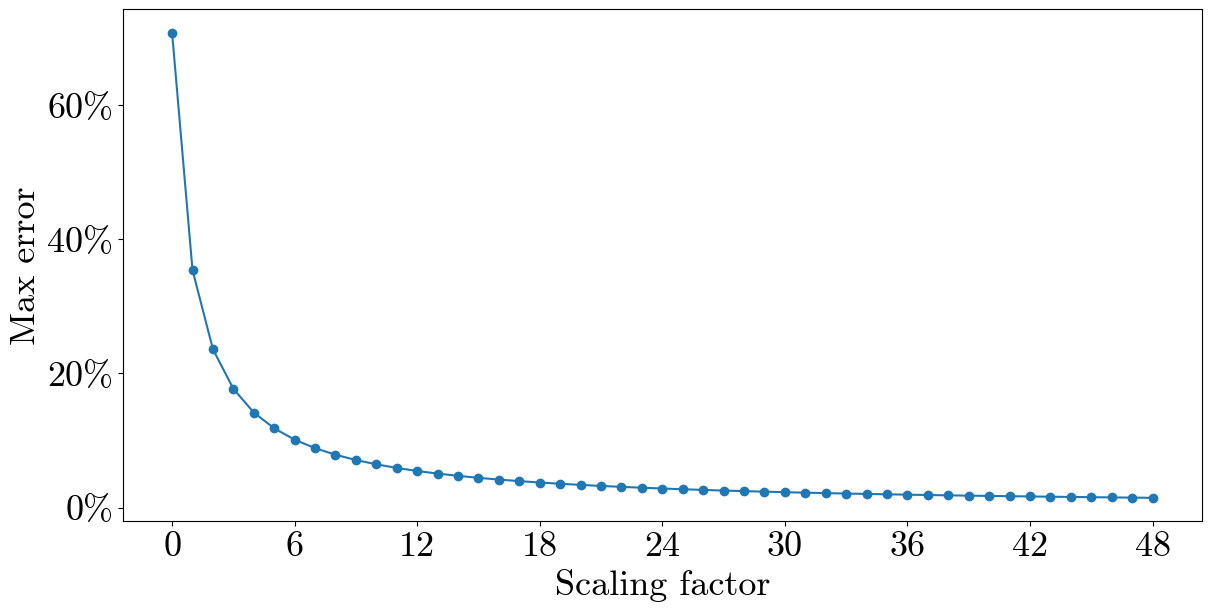

In [168]:
import plotly.graph_objects as go

errors = []
for i in range(1,50):
    errors.append(1/2 * np.sqrt(2 * (1/i)**2) *100)

# fig = go.Figure()
# scatter_density_of_height_width = go.Scatter(y=errors, x=[i+1 for i in range(len(errors))],
#                     mode='markers',
#                     name='markers',
#                     )
# fig.add_trace(scatter_density_of_height_width)

# fig.update_layout(
#         xaxis_title=dict(text='Scaling factor', font=dict(size=35)),
#         yaxis_title=dict(text='Max error (%)', font=dict(size=35)),
# )
# fig.update_layout({
#             "paper_bgcolor": "rgba(0, 0, 0, 0)",
#             "plot_bgcolor": "rgba(0, 0, 0, 0)", })
# fig.update_layout(
#     font_family="DejaVu Sans",
#     font_color="black",
#     title_font_family="DejaVu Sans",
#     title_font_color="black",
# )
# fig.update_xaxes(showgrid=False, zeroline=True)
# fig.update_yaxes(showgrid=False, zeroline=True)
# fig.update_xaxes({'gridcolor': 'red', 'zerolinecolor': 'black', 'linecolor': 'white', 'linewidth': 5})
# fig.update_yaxes({'zerolinecolor': 'black'})
# # fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
# # fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
# fig.update_layout(font_size=35)
# fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/scaling_error.svg", height=600, width=1200)
# fig.show()
fig, axs = plt.subplots(1, 1, figsize=(12, 6), layout='constrained')

axs.plot(list(range(len(errors))), errors, 'o-', label=f"", ) #, 'o', ls='-', ms=4)
axs.set_ylabel('Max error')
axs.yaxis.set_major_formatter('{x:1.0f}%')
axs.set_xlabel('Scaling factor')
# axs[0,0].legend(loc=loc)
axs.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.show()
fig.savefig("D:/Master/MasterProject/Overleaf_figures/Chapter4/scaling_error.svg")

# 4.1.6 - EDA Label size dist

In [24]:
dataset_path = "D:/Master/MasterProject/dataset_creation/datasets/FINAL_DATASET_cutout_with_padding/compiled_datasets_16bit_medium/train"
dataset_features = dataset_path + "/images"
dataset_labels = dataset_path + "/labels"

ids_features = os.listdir(dataset_features)
features = [os.path.join(dataset_features, image_id) for image_id in ids_features]

ids_labels = os.listdir(dataset_labels)
labels = [os.path.join(dataset_labels, image_id) for image_id in ids_labels]

feature_images = []
labels_images = []
for i_path in range(len(features)):
    feature_image = cv2.imread(features[i_path], cv2.IMREAD_GRAYSCALE)
    feature_images.append(feature_image)
    label_image = cv2.imread(labels[i_path], cv2.IMREAD_GRAYSCALE)
    labels_images.append(label_image)

label_size_dist = {
    "0":[],
    "1":[],
    "name":[]
}
# Label size dist
for l in range(len(labels_images)):
    label_size = labels_images[l][labels_images[l] == 1].size
    label_size_dist["1"].append(label_size)
    label_size_dist["0"].append(1024*1024 - label_size)
    label_size_dist["name"].append(ids_labels[l])
label_size_dist = pd.DataFrame(label_size_dist)

In [25]:
# # fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/Granule_size_distribution.svg")
# fig = px.histogram(x=label_size_dist["1"] / (1024*1024),
#                    marginal="box",
#                    nbins=50)
# fig.update_layout(
#     {
#         "paper_bgcolor": "rgba(0, 0, 0, 0)",
#         # "plot_bgcolor": "rgba(0, 0, 0, 0)",
#     }
# )
# fig.update_layout(font_size=20)
# fig.update_layout({
#     "paper_bgcolor": "rgba(0, 0, 0, 0)",
#     "plot_bgcolor": "rgba(0, 0, 0, 0)", })
# fig.update_layout(
#     font_family="DejaVu Sans",
#     font_color="black",
#     title_font_family="DejaVu Sans",
#     title_font_color="black",
# )
# fig.update_layout(
#     xaxis_title="Granule label sizes (%)", yaxis_title="Count"
# )
# fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/granule_image_aspect_ratio_dist_SMALL_DATASET.svg", height=600, width=1200)
# fig.show()

In [26]:
# f = labels_images[1048] # Creates 4 granule label images side by side

# fig = make_subplots(rows=1, cols=4, shared_yaxes=True, shared_xaxes=True)
# for i, pos in enumerate([(1,1),(1,2),(1,3),(1,4)]):
#     r,c = pos
#     fig.add_trace(go.Heatmap(z=labels_images[o[i]], colorscale='viridis'), row=r, col=c) # Inferno
# fig.update_layout(width=1200, height=500, showlegend=False, font_size=20)
# fig.update_traces(showscale=False)
# fig.update_layout(
#     {
#         # "paper_bgcolor": "rgba(0, 0, 0, 0)",
#         # "plot_bgcolor": "rgba(0, 0, 0, 0)",
#     }
# )
# fig.show()

C:\Users\Endre\AppData\Local\Temp\ipykernel_183416\3528160458.py:31: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



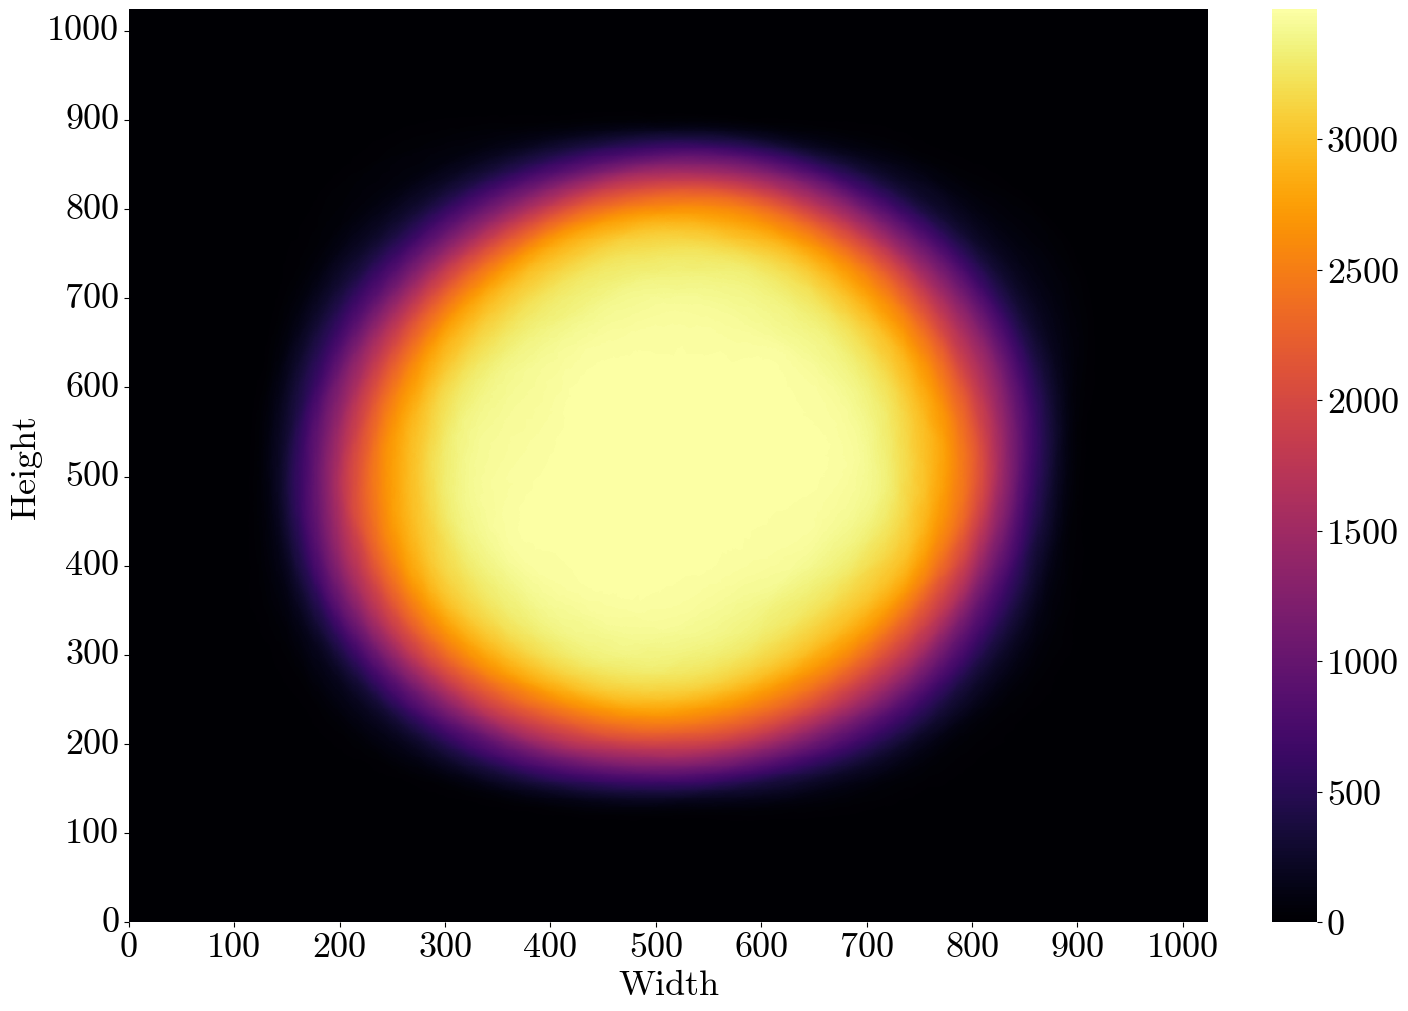

In [27]:
mask_cum = np.zeros((1024,1024))
for im2 in labels_images[2:]:
    mask_cum += im2

# fig = go.Figure() # /np.max(mask_cum)
# fig.add_trace(go.Heatmap(z=mask_cum, colorscale='Inferno'))
# fig.update_layout( width=1200, height=1000, showlegend=False, font_size=35)
# fig.update_layout({
#     "paper_bgcolor": "rgba(0, 0, 0, 0)",
#     "plot_bgcolor": "rgba(0, 0, 0, 0)", })
# fig.update_layout(
#     font_family="DejaVu Sans",
#     font_color="black",
#     title_font_family="DejaVu Sans",
#     title_font_color="black",
# )
# fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/Average_granule_SMALL_DATASET.svg", height=1000, width=1000)
# fig.show()

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 10), layout='constrained')
cmap = plt.colormaps["inferno"]
g1 = sns.heatmap(mask_cum, ax=ax1, rasterized=True, cmap=cmap)
# https://stackoverflow.com/questions/27092991/white-lines-in-matplotlibs-pcolor To fix artifacts
# ax1.imshow(heatmap,  cmap='hot')#, extent=[heatmap.min(), heatmap.max(), heatmap.min(), heatmap.max()])  # interpolation='nearest',
g1.set_ylabel('Height')
g1.set_xlabel('Width')
g1.set_xticks(np.arange(0, 1024+1, 100), np.arange(0, 1024+1, 100))
g1.set_yticks(np.arange(0, 1024+1, 100), np.arange(0, 1024+1, 100))
ax1.invert_yaxis()
plt.xticks(rotation=0)
fig.show()
fig.savefig("D:/Master/MasterProject/Overleaf_figures/Chapter4/Average_granule_SMALL_DATASET.svg")

In [28]:
label_size_df = pd.read_csv("D:/Master/MasterProject/dataset_creation/datasets/FINAL_DATASET_cutout_with_padding/label_size_dataframe_with_deletions.csv", index_col=0)
assert label_size_df[(0.1 > label_size_df['label_size'])].empty, "ERRORS IN DATASET"
assert label_size_df[(0.5 < label_size_df['label_size'])].empty, "ERRORS IN DATASET"

indexes = []

for i in np.linspace(0.1,0.5,18): # [0,0.1,0.2,0.3,0.4]
    split: pd.DataFrame = label_size_df[(i < label_size_df['label_size']) & (label_size_df['label_size'] < (i+0.025))]
    if (split.size == 0) or (split.__len__() < 280):
        continue
    print(split.size)
    # if split.size > 600:
    sample_labels = list(split.sample(280, replace=False).index.values)
    indexes += (sample_labels)
    # print(split.index)
    print("-----------------") # 244
# get leftover
# split: pd.DataFrame = label_size_df[(0.1 < label_size_df['label_size']) & (label_size_df['label_size'] < (0.15))].index.values
# indexes += (sample_labels)

# print(split.__len__())
even_dataset = label_size_df.loc[indexes].reset_index()
even_dataset.shape

2278
-----------------
11106
-----------------
35310
-----------------
57652
-----------------
57700
-----------------
49422
-----------------
34548
-----------------
27876
-----------------
19578
-----------------
14682
-----------------
4714
-----------------
1860
-----------------


(3360, 3)

In [29]:
even_dataset.to_csv("D:/Master/MasterProject/dataset_creation/datasets/FINAL_DATASET_cutout_with_padding/EVEN_DATASET.csv")

[<matplotlib.axis.XTick object at 0x00000223A3C6D870>, <matplotlib.axis.XTick object at 0x00000223A3C6F0D0>, <matplotlib.axis.XTick object at 0x00000223A0B43A60>, <matplotlib.axis.XTick object at 0x000002239F7051E0>, <matplotlib.axis.XTick object at 0x000002239F788250>, <matplotlib.axis.XTick object at 0x000002239F78B790>, <matplotlib.axis.XTick object at 0x000002239E887A00>, <matplotlib.axis.XTick object at 0x000002239E885180>, <matplotlib.axis.XTick object at 0x000002239E884610>, <matplotlib.axis.XTick object at 0x000002239E886020>]


C:\Users\Endre\AppData\Local\Temp\ipykernel_183416\4206950107.py:38: UserWarning:

The figure layout has changed to tight

C:\Users\Endre\AppData\Local\Temp\ipykernel_183416\4206950107.py:40: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



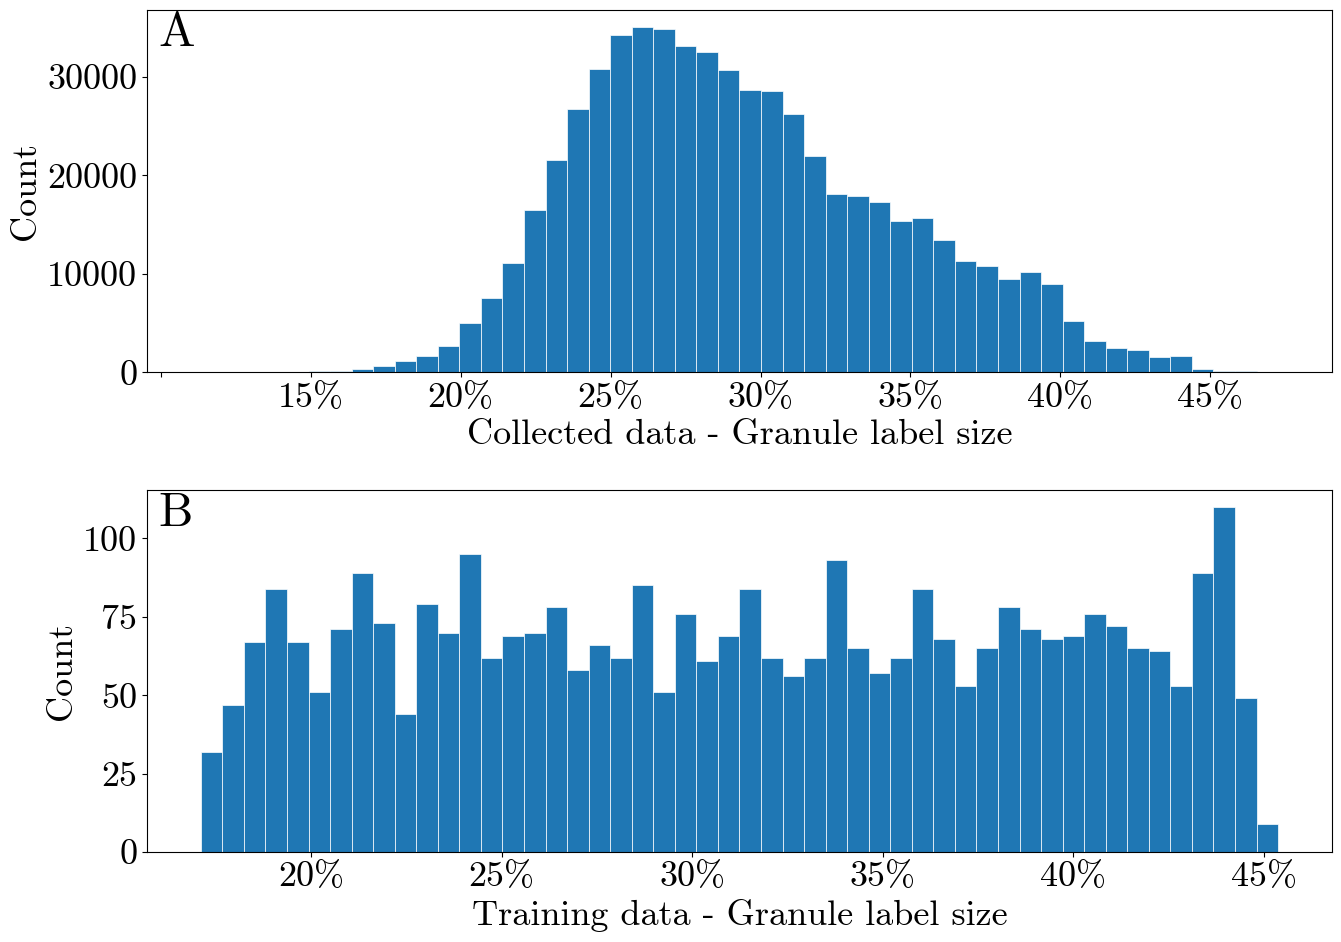

In [216]:
# # fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/Granule_size_distribution.svg")
# fig = px.histogram(x=even_dataset["label_size"],
#                    marginal="box",
#                    nbins=50)
# fig.update_layout(
#     {
#         "paper_bgcolor": "rgba(0, 0, 0, 0)",
#         # "plot_bgcolor": "rgba(0, 0, 0, 0)",
#     }
# )
# fig.update_layout(font_size=20)
# fig.update_layout(
#     xaxis_title="Granule label sizes (%)", yaxis_title="Count"
# )
# fig.write_image(file="D:/Master/MasterProject/Overleaf_figures/Chapter4/granule_image_label_dist_SMALL_DATASET.svg", height=600, width=1200)
# fig.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), layout='constrained')

ax1.hist(stats_df["1"]*100, bins=50, linewidth=0.5, edgecolor="white")
ax1.set_ylabel('Count')
ax1.set_xlabel('Collected data - Granule label size')
ax1.set_xlim(ax1.get_xlim()[0], ax1.get_xlim()[1])
ax1.xaxis.set_major_formatter('{x:1.0f}%')
# l = ax1.get_xticklabels()[1] = ''
# ax1.set_xticklabels()
xticks = ax1.xaxis.get_major_ticks()
xticks[1].label1.set_visible(False)
print(xticks)

ax2.hist(even_dataset["label_size"]*100, bins=50, linewidth=0.5, edgecolor="white")
ax2.set_ylabel('Count')
ax2.set_xlabel('Training data - Granule label size')
ax2.xaxis.set_major_formatter('{x:1.0f}%')

ax1.annotate('A', xy=(0.01, 0.9), xycoords='axes fraction', color="black", fontsize=35)
ax2.annotate('B', xy=(0.01, 0.9), xycoords='axes fraction', color="black", fontsize=35)
fig.tight_layout()
fig.savefig("D:/Master/MasterProject/Overleaf_figures/Chapter4/granule_image_label_dist_SMALL_DATASET.svg")
fig.show()

In [31]:
# For checking and removing errors in dataset
# # l = label_size_df[(0.12 > label_size_df['label_size']) & (0.1 < label_size_df['label_size'])]
# l = label_size_df[(0.1 > label_size_df['label_size'])]
# l

# for name in l['label_name']: 
#     test_img = f"D:/Master/MasterProject/dataset_creation/datasets/FINAL_DATASET_cutout_with_padding/labels_as_images/{name}.png"
#     test_img = cv2.imread(test_img, cv2.IMREAD_GRAYSCALE)

#     fig = go.Figure() # /np.max(mask_cum)
#     fig.add_trace(go.Heatmap(z=test_img, colorscale='Inferno'))
#     fig.update_layout( width=1200, height=1000, showlegend=False, font_size=20)
#     fig.show()

In [32]:
# mask = cv2.imread("D:/Master/MasterProject/dataset_creation/datasets/FINAL_DATASET_cutout_with_padding/images_grayscale_16bit_gradient/2020-02-05_14.34.33--NAs--T1354-GFP_Burst_Frame_0_Granule_7_gradient.png", cv2.IMREAD_UNCHANGED)
# fig = go.Figure()
# fig.add_trace(go.Heatmap(z=mask, colorscale='Inferno'))
# fig.update_layout(width=1200, height=1000, showlegend=False, font_size=20)
# fig.show()


In [33]:
encoders = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'resnext50_32x4d', 'resnext101_32x4d', 'resnext101_32x8d', 'resnext101_32x16d', 'resnext101_32x32d', 'resnext101_32x48d', 'dpn68', 'dpn68b', 'dpn92', 'dpn98', 'dpn107', 'dpn131', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'senet154', 'se_resnet50', 'se_resnet101', 'se_resnet152', 'se_resnext50_32x4d', 'se_resnext101_32x4d', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'inceptionresnetv2', 'inceptionv4', 'efficientnet-b0', 'efficientnet-b1', 'efficientnet-b2', 'efficientnet-b3', 'efficientnet-b4', 'efficientnet-b5', 'efficientnet-b6', 'efficientnet-b7', 'mobilenet_v2', 'xception', 'timm-efficientnet-b0', 'timm-efficientnet-b1', 'timm-efficientnet-b2', 'timm-efficientnet-b3', 'timm-efficientnet-b4', 'timm-efficientnet-b5', 'timm-efficientnet-b6', 'timm-efficientnet-b7', 'timm-efficientnet-b8', 'timm-efficientnet-l2', 'timm-tf_efficientnet_lite0', 'timm-tf_efficientnet_lite1', 'timm-tf_efficientnet_lite2', 'timm-tf_efficientnet_lite3', 'timm-tf_efficientnet_lite4', 'timm-resnest14d', 'timm-resnest26d', 'timm-resnest50d', 'timm-resnest101e', 'timm-resnest200e', 'timm-resnest269e', 'timm-resnest50d_4s2x40d', 'timm-resnest50d_1s4x24d', 'timm-res2net50_26w_4s', 'timm-res2net101_26w_4s', 'timm-res2net50_26w_6s', 'timm-res2net50_26w_8s', 'timm-res2net50_48w_2s', 'timm-res2net50_14w_8s', 'timm-res2next50', 'timm-regnetx_002', 'timm-regnetx_004', 'timm-regnetx_006', 'timm-regnetx_008', 'timm-regnetx_016', 'timm-regnetx_032', 'timm-regnetx_040', 'timm-regnetx_064', 'timm-regnetx_080', 'timm-regnetx_120', 'timm-regnetx_160', 'timm-regnetx_320', 'timm-regnety_002', 'timm-regnety_004', 'timm-regnety_006', 'timm-regnety_008', 'timm-regnety_016', 'timm-regnety_032', 'timm-regnety_040', 'timm-regnety_064', 'timm-regnety_080', 'timm-regnety_120', 'timm-regnety_160', 'timm-regnety_320', 'timm-skresnet18', 'timm-skresnet34', 'timm-skresnext50_32x4d', 'timm-mobilenetv3_large_075', 'timm-mobilenetv3_large_100', 'timm-mobilenetv3_large_minimal_100', 'timm-mobilenetv3_small_075', 'timm-mobilenetv3_small_100', 'timm-mobilenetv3_small_minimal_100', 'timm-gernet_s', 'timm-gernet_m', 'timm-gernet_l', 'mit_b0', 'mit_b1', 'mit_b2', 'mit_b3', 'mit_b4', 'mit_b5', 'mobileone_s0', 'mobileone_s1', 'mobileone_s2', 'mobileone_s3', 'mobileone_s4']